In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
 
df = pd.read_csv("/Users/Rakene/Documents/Academics/281/20211104_AllResults.csv")
df = df.drop('deviation_pct', axis=1)
df = df.drop('fuel', axis=1)
 
df.head()

,gen_id,period,day,month,year,scenario,nominal_ramp,observed_ramp,ramp_pct,p_max,p_min,pg,cf,deviation,lmp
0,1,1,0,0,0,0,160.04,-16.2700,-0.101662,1299.0,0.0,1290.7560,0.993654,-1.406875e-13,13.016512
1,1,2,0,0,0,0,160.04,-26.2136,-0.163794,1299.0,0.0,1274.4860,0.981129,1.068656e-13,12.007962
2,1,3,0,0,0,0,160.04,-14.7216,-0.091987,1299.0,0.0,1248.2724,0.960949,-1.671197e-13,10.277948
3,1,4,0,0,0,0,160.04,6.8920,0.043064,1299.0,0.0,1233.5508,0.949616,-1.648459e-14,9.376946
4,1,5,0,0,0,0,160.04,19.9856,0.124879,1299.0,0.0,1240.4428,0.954921,2.955858e-14,9.013704


In [3]:
# fit the model
mod = smf.quantreg('deviation ~ period + day + month + year + nominal_ramp + observed_ramp + ramp_pct + p_max + p_min + pg + cf',df)
#model = smf.quantreg('deviation ~ observed_ramp',df).fit(q=0.7)
 

# view model summary
#print(model.summary())

In [5]:
quantiles = np.arange(0.05, 0.96, 0.3)
print(quantiles)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["pg"]] + res.conf_int().loc[
        "pg"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

#ols = smf.ols("foodexp ~ income", data).fit()
#ols_ci = ols.conf_int().loc["income"].tolist()
#ols = dict(
#    a=ols.params["Intercept"], b=ols.params["income"], lb=ols_ci[0], ub=ols_ci[1]
#)

print(models)
#print(ols)

[0.05 0.35 0.65 0.95]
      q         a         b        lb        ub
0  0.05  0.051858 -0.555425 -0.555433 -0.555416
1  0.35  0.860857 -0.023015 -0.023044 -0.022986
2  0.65  2.036062  0.003174  0.003111  0.003236
3  0.95  7.672329 -0.233175 -0.233404 -0.232945


In [18]:
print(models[0].summary())

KeyError: 0

Text(0.5, 1.0, 'PG vs Deviation')

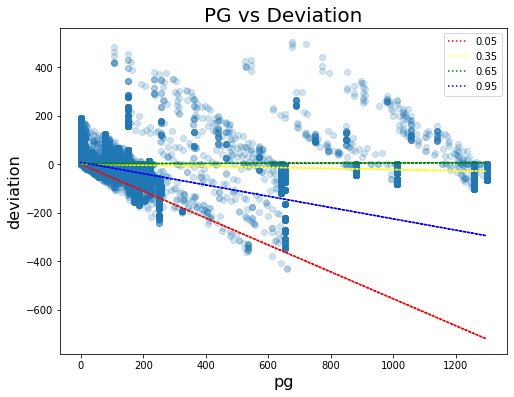

In [13]:
#x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * df.pg

fig, ax = plt.subplots(figsize=(8, 6))

colors = ["red","yellow", "green", "blue"]

labels = ["0.05", "0.35", "0.65", "0.95"]

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(df.pg, y, linestyle="dotted", color=colors[i], label=labels[i])

#y = get_y(ols["a"], ols["b"])

#ax.plot(x, y, color="red", label="OLS")
ax.scatter(df.pg, df.deviation, alpha=0.2)
#ax.set_xlim((240, 3000))
#ax.set_ylim((240, 2000))
ax.legend()
ax.set_xlabel("pg", fontsize=16)
ax.set_ylabel("deviation", fontsize=16)
ax.set_title("PG vs Deviation", fontsize=20)

Text(0, 0.5, 'Deviation')

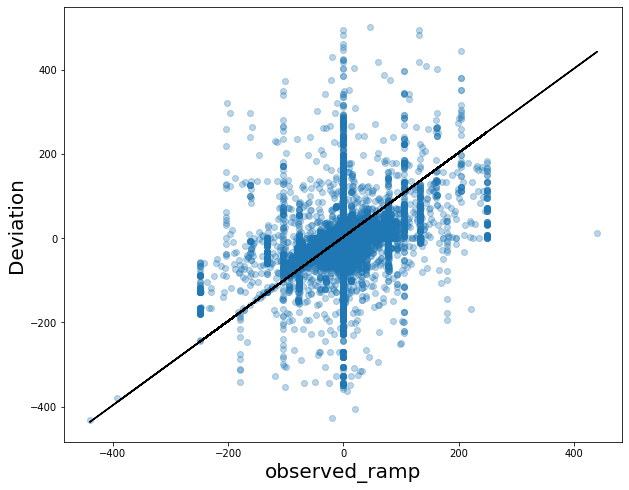

In [32]:
# define figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
 
# get y values
y_line = lambda a, b: a + df.observed_ramp
y = y_line(model.params['Intercept'],
           model.params['observed_ramp'])
 
# Plotting data points with the help
# pf quantile regression equation
ax.plot(df.observed_ramp, y, color='black')
ax.scatter(df.observed_ramp, df.deviation, alpha=.3)
ax.set_xlabel('observed_ramp', fontsize=20)
ax.set_ylabel('Deviation', fontsize=20)